In [3]:
AIRLINES DATA ANALYSIS PROJECT

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv("C:\\Users\\salma\\Downloads\\airlines_flights_data.csv")
data

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [9]:
data.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [7]:
data.tail()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [11]:
data.describe()

,index,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [13]:
data.isnull().sum()

index               0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [15]:
data[data.duplicated()]

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price


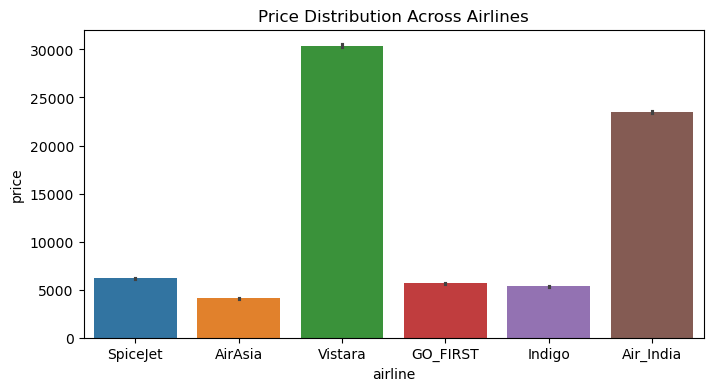

In [21]:
#Data visualization

#1.Price Distribution across Airlines 

plt.figure(figsize=(8,4))
sns.barplot(x="airline", y="price", data=data,hue='airline')
plt.title("Price Distribution Across Airlines")
plt.show()


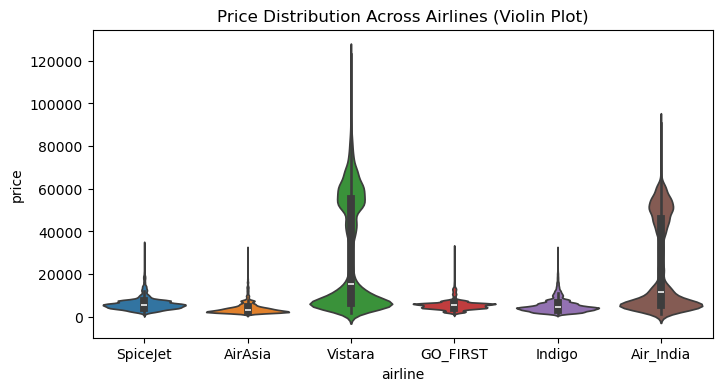

In [26]:
#Violin plot
plt.figure(figsize=(8,4))
sns.violinplot(x="airline", y="price", data=data, hue = 'airline')
plt.title("Price Distribution Across Airlines (Violin Plot)")
plt.show()



In [29]:
#2.Average Price: Economy vs. Business Class 
Average_price = data.groupby("class")["price"].mean().reset_index()
values = Average_price['price']
labels = Average_price['class']
explode = [0.2,0]



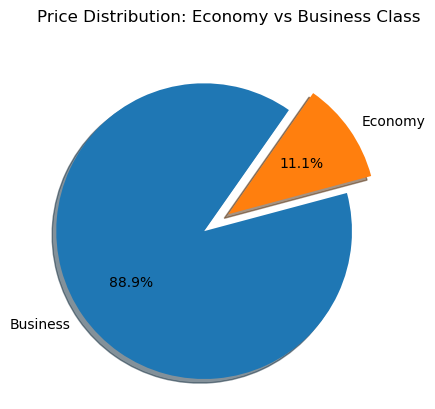

In [33]:
plt.pie(values,labels=labels,autopct='%1.1f%%',startangle=55,shadow=True,explode=explode)
plt.title("Price Distribution: Economy vs Business Class")
plt.show()


In [35]:
#3.Busiest Source & Destination Cities 

# Count busiest sources
source_counts = data["source_city"].value_counts().reset_index()
source_counts.columns = ["destination_city", "flight"]

In [37]:
# Count busiest destinations
dest_counts = data["destination_city"].value_counts().reset_index()
dest_counts.columns = ["destination_city", "flight"]

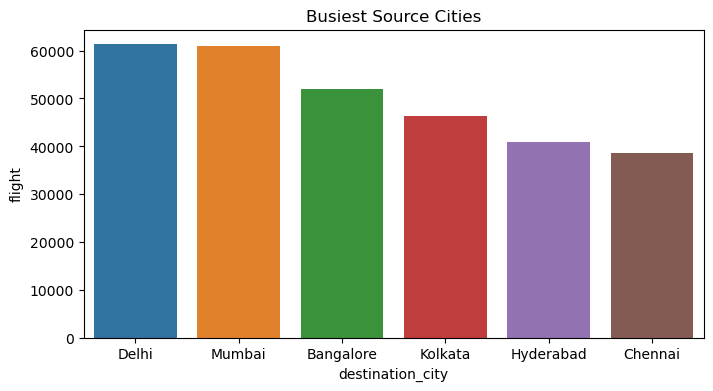

In [39]:
#A) Top Source Cities

plt.figure(figsize=(8,4))
sns.barplot(x="destination_city", y="flight", data=source_counts,hue='destination_city')
plt.title("Busiest Source Cities")
plt.show()


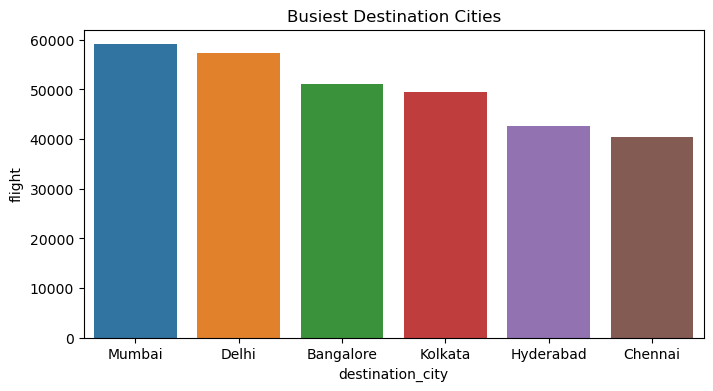

In [41]:
#B)Top Destination Cities
plt.figure(figsize=(8,4))
sns.barplot(x="destination_city",y="flight", data=dest_counts,hue='destination_city')
plt.title("Busiest Destination Cities")
plt.show()


C:\Users\salma\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


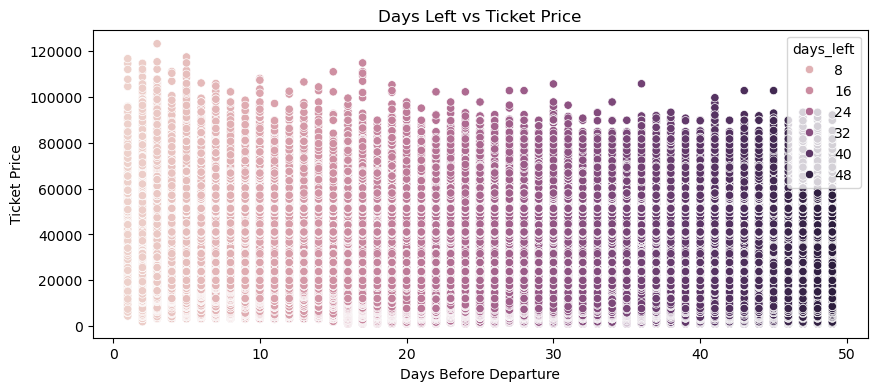

In [43]:
#4.Days Left vs. Ticket Price Trend 

#scatter plot
plt.figure(figsize=(10,4))
sns.scatterplot(x="days_left", y="price", data=data,hue="days_left")
plt.title("Days Left vs Ticket Price")
plt.xlabel("Days Before Departure")
plt.ylabel("Ticket Price")
plt.show()
 

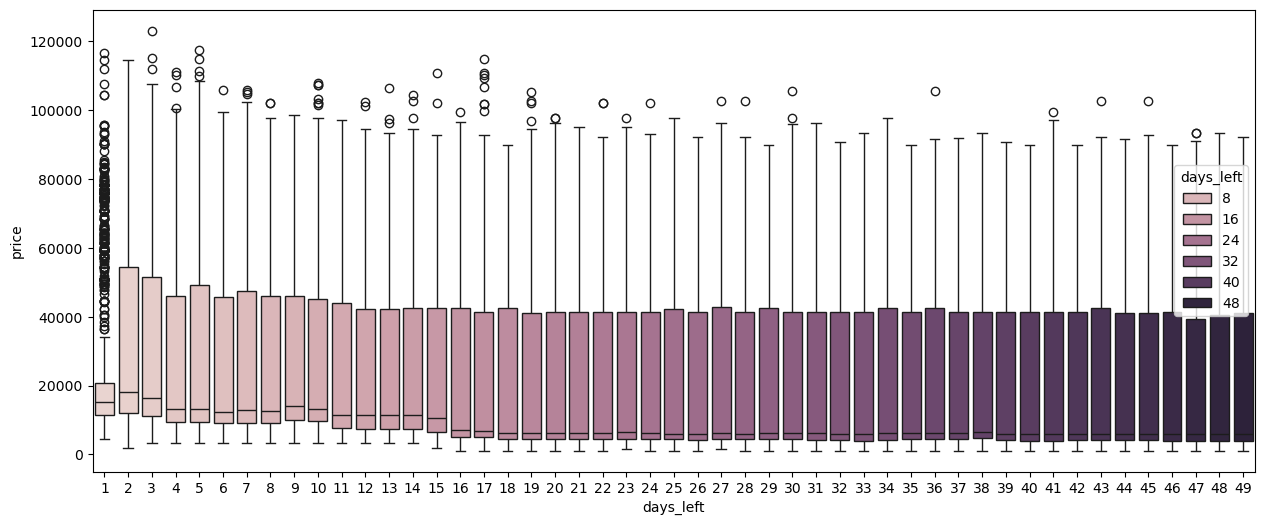

In [37]:
plt.figure(figsize=(15,6))
sns.boxplot(x='days_left',y='price', data=data,hue='days_left')
plt.show()

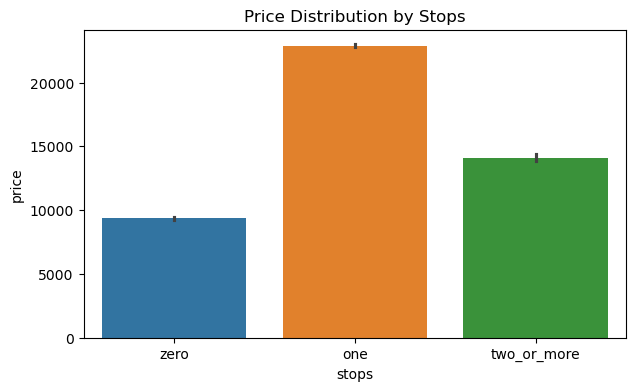

In [44]:
#5.Stops vs. Price Comparison 
plt.figure(figsize=(7,4))
sns.barplot(x="stops", y="price", data=data,hue='stops')
plt.title("Price Distribution by Stops")
plt.show()


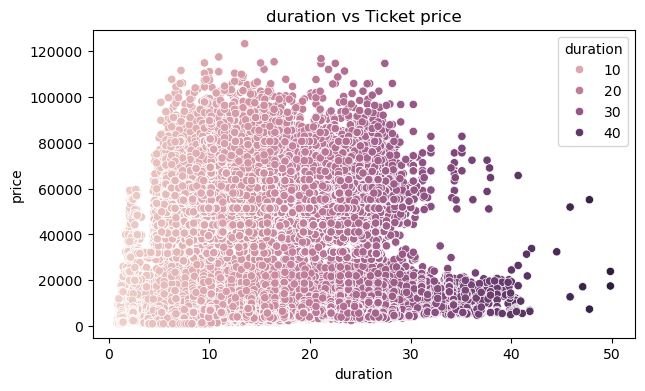

In [49]:
#6.Duration Impact on Ticket Pricing 
plt.figure(figsize=(7,4))
sns.scatterplot(x="duration", y="price",data=data,hue="duration")
plt.title("duration vs Ticket price")
plt.show()

In [1]:
!pip install pandasql

In [3]:
import pandas as pd
import pandasql as ps
#Load CSV into pandas DataFrame
df=pd.read_csv("C:\\Users\\salma\\Downloads\\airlines_flights_data.csv")
df

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [85]:
#SQL QUERIES

#1.Find the average ticket price per airline.
import pandasql as ps
query= """
SELECT airline, AVG(price) as avg_price
FROM df
WHERE source_city = 'Delhi'
GROUP BY airline
ORDER BY avg_price DESC
LIMIT 5;
"""
result = ps.sqldf(query, locals())
print(result)

     airline     avg_price
0    Vistara  28938.500342
1  Air_India  21899.890758
2   SpiceJet   6084.649762
3   GO_FIRST   5742.409679
4     Indigo   5386.570134


In [83]:
#2.List the top 5 most expensive routes (source to destination).

import pandasql as ps
query= """
SELECT 
    source_city, 
    destination_city, 
    AVG(price) AS Average_price
FROM 
    df
GROUP BY 
    source_city, destination_city
ORDER BY 
    Average_price DESC
LIMIT 5;
"""
result = ps.sqldf(query, locals())
print(result)

  source_city destination_city  Average_price
0     Chennai        Bangalore   25081.850454
1     Kolkata          Chennai   23660.361040
2   Bangalore          Kolkata   23500.061229
3   Bangalore          Chennai   23321.850078
4      Mumbai        Bangalore   23147.873807


In [81]:
#3.Which airline offers the lowest average ticket price for Business class?

import pandas as pd
import pandasql as ps
query = """
SELECT airline, AVG(price) AS avg_Business_price
FROM df
WHERE class = 'Business'
GROUP BY airline
ORDER BY avg_Business_price
LIMIT 1;
"""
result = ps.sqldf(query, locals())
print(result)

     airline  avg_Business_price
0  Air_India        47131.039212


In [79]:
#4.Find routes with more than 50 flights and their average ticket prices.

import pandasql as ps
query = """
SELECT source_city, destination_city, COUNT(*) as flight_count,AVG(price) as avg_price
FROM df
GROUP BY source_city, destination_city
HAVING COUNT(*)> 50;
"""
result = ps.sqldf(query, locals())
print(result)

   source_city destination_city  flight_count     avg_price
0    Bangalore          Chennai          6410  23321.850078
1    Bangalore            Delhi         13756  17723.313972
2    Bangalore        Hyderabad          8928  21226.121192
3    Bangalore          Kolkata         10028  23500.061229
4    Bangalore           Mumbai         12939  23128.618672
5      Chennai        Bangalore          6493  25081.850454
6      Chennai            Delhi          9783  18981.863948
7      Chennai        Hyderabad          6103  21591.345404
8      Chennai          Kolkata          6983  22669.932407
9      Chennai           Mumbai          9338  22765.849647
10       Delhi        Bangalore         14012  17880.216315
11       Delhi          Chennai         10780  19369.881354
12       Delhi        Hyderabad          9328  17347.288379
13       Delhi          Kolkata         11934  20566.409418
14       Delhi           Mumbai         15289  19355.829812
15   Hyderabad        Bangalore         

In [93]:
#5. Compare average price difference between Economy and Business class per airline. 

import pandasql as ps
query = """
SELECT 
    airline,
    MAX(CASE WHEN class = 'Business' THEN avg_price END) -
    MAX(CASE WHEN class = 'Economy' THEN avg_price END) AS price_diff
FROM (
    SELECT 
        airline,
        class,
        AVG(price) AS avg_price
    FROM df
    WHERE class IN ('Economy', 'Business')
    GROUP BY airline, class
) t
GROUP BY airline
ORDER BY price_diff DESC;

"""
result = ps.sqldf(query, locals())
print(result)

     airline    price_diff
0    Vistara  47670.084132
1  Air_India  39817.357044
2   SpiceJet           NaN
3     Indigo           NaN
4   GO_FIRST           NaN
5    AirAsia           NaN


In [77]:
#6. Which cities have the most incoming flights?  

import pandasql as ps
query = """
SELECT destination_city as citty, COUNT(*) as incoming_flights
FROM df
GROUP BY destination_city
ORDER BY incoming_flights DESC;
"""
result = ps.sqldf(query, locals())
print(result)

       citty  incoming_flights
0     Mumbai             59097
1      Delhi             57360
2  Bangalore             51068
3    Kolkata             49534
4  Hyderabad             42726
5    Chennai             40368


In [75]:
#7.Which cities have the most outgoing flights? 

import pandasql as ps
query = """
SELECT source_city as city, COUNT(*) as total_outgoing_flights
FROM df
GROUP BY source_city
ORDER BY total_outgoing_flights DESC;
"""
resul = ps.sqldf(query, locals())
print(result)

  source_city destination_city  total_flights
0       Delhi           Mumbai          15289


In [73]:
#8.Find the busiest route (most number of flights). 

import pandasql as ps
query = """
SELECT source_city,destination_city, COUNT(*) as total_flights
FROM df
GROUP BY source_city,destination_city
ORDER BY total_flights DESC
LIMIT 1;
"""
result = ps.sqldf(query, locals())
print(result)

  source_city destination_city  total_flights
0       Delhi           Mumbai          15289


In [99]:
#9. List the top 3 airlines with cheapest average prices for each route. 

import pandasql as ps
query = """
SELECT 
    source_city, 
    destination_city, 
    airline, 
    avg_price
FROM (
    SELECT 
        source_city,
        destination_city,
        airline,
        AVG(price) AS avg_price,
        ROW_NUMBER() OVER (
            PARTITION BY source_city, destination_city 
            ORDER BY AVG(price) ASC
        ) AS rn
    FROM df
    GROUP BY source_city, destination_city, airline
) ranked
WHERE rn <= 3
ORDER BY source_city, destination_city, avg_price;

"""
result = ps.sqldf(query,locals())
print(result)

   source_city destination_city   airline    avg_price
0    Bangalore          Chennai   AirAsia  2073.043478
1    Bangalore          Chennai    Indigo  2363.326241
2    Bangalore          Chennai  SpiceJet  2613.310345
3    Bangalore            Delhi   AirAsia  4807.092426
4    Bangalore            Delhi  GO_FIRST  5524.702628
..         ...              ...       ...          ...
85      Mumbai        Hyderabad  GO_FIRST  4603.866889
86      Mumbai        Hyderabad    Indigo  5870.954610
87      Mumbai          Kolkata   AirAsia  3977.937365
88      Mumbai          Kolkata  GO_FIRST  6106.502609
89      Mumbai          Kolkata  SpiceJet  7065.210689

[90 rows x 4 columns]


In [71]:
#10.Find flights with duration more than 5 hours but priced below average. 

import pandasql as ps
query ="""
SELECT *FROM df
WHERE duration >5
AND price < (SELECT AVG(price) FROM data);
"""
result = ps.sqldf(query,locals())
print(result)

         index    airline  flight source_city departure_time        stops  \
0           18    AirAsia  I5-747       Delhi        Evening          one   
1           19    AirAsia  I5-747       Delhi        Evening          one   
2           20   GO_FIRST  G8-266       Delhi  Early_Morning          one   
3           21   GO_FIRST  G8-101       Delhi  Early_Morning          one   
4           22   GO_FIRST  G8-103       Delhi        Evening          one   
...        ...        ...     ...         ...            ...          ...   
169086  206663    Vistara  UK-826     Chennai      Afternoon          one   
169087  206664    Vistara  UK-822     Chennai        Morning          one   
169088  206665    Vistara  UK-824     Chennai          Night          one   
169089  258681  Air_India  AI-776   Bangalore  Early_Morning  two_or_more   
169090  258806  Air_India  AI-776   Bangalore  Early_Morning  two_or_more   

         arrival_time destination_city     class  duration  days_left  pric

In [97]:
#11. Which flight class shows the highest average price variation (std deviation)?  

import pandasql as ps
query = """
SELECT 
    class, AVG(price) AS price_std_dev
FROM df
GROUP BY class
ORDER BY price_std_dev DESC;
"""
result = ps.sqldf(query,locals())
print(result)

      class  price_std_dev
0  Business   52540.081124
1   Economy    6572.342383


In [67]:
#12.Find how ticket prices vary with number of days left before departure.  

import pandasql as ps
query="""
SELECT days_left, AVG(price) as avg_price
FROM df
GROUP BY days_left
ORDER BY avg_price DESC;
"""
result = ps.sqldf(query, locals())
print(result)

    days_left     avg_price
0           2  30211.299801
1           3  28976.083569
2           5  26679.773368
3           4  25730.905653
4           9  25726.246072
5           7  25588.367351
6          10  25572.819134
7           8  24895.883995
8           6  24856.493902
9          11  22990.656070
10         14  22678.002363
11         12  22505.803322
12         13  22498.885384
13         15  21952.540852
14          1  21591.867151
15         16  20503.546237
16         17  20386.353949
17         18  19987.445168
18         27  19950.866195
19         23  19840.913451
20         24  19803.908896
21         29  19744.653119
22         38  19734.912316
23         20  19699.983390
24         22  19590.667385
25         25  19571.641791
26         30  19567.580834
27         34  19562.008266
28         28  19534.986047
29         36  19517.688444
30         19  19507.677375
31         37  19506.306516
32         21  19430.494058
33         31  19392.706612
34         41  19347

In [61]:
#13. Which time of day (Morning, Evening, etc.) has the highest average ticket price? 

import pandasql as ps
query = """
SELECT arrival_time,departure_time, AVG(price) as avg_price
FROM df
GROUP BY arrival_time,departure_time
ORDER BY avg_price DESC
LIMIT 1;
"""
result = ps.sqldf(query, locals())
print(result)

  arrival_time departure_time     avg_price
0      Evening          Night  31425.824194


In [63]:
#14. Find Price trends by airline and travel class 

import pandasql as ps
query= """
SELECT airline, class, AVG(price) as avg_price
FROM df
GROUP BY airline,class
ORDER BY airline,avg_price DESC;
"""
result = ps.sqldf(query, locals())
print(result)

     airline     class     avg_price
0    AirAsia   Economy   4091.072742
1  Air_India  Business  47131.039212
2  Air_India   Economy   7313.682169
3   GO_FIRST   Economy   5652.007595
4     Indigo   Economy   5324.216303
5   SpiceJet   Economy   6179.278881
6    Vistara  Business  55477.027777
7    Vistara   Economy   7806.943645


In [65]:
#15.Compare the airlines average prices for non-stop vs. 1-stop vs. 2+ stops flights. 

import pandasql as ps
query="""
SELECT airline, stops as stop_type, AVG(price) as avg_price
FROM df
GROUP BY airline, stops
ORDER BY airline, avg_price DESC;
"""
result = ps.sqldf(query, locals())
print(result)

      airline    stop_type     avg_price
0     AirAsia  two_or_more   4432.956367
1     AirAsia          one   4096.963741
2     AirAsia         zero   3747.960970
3   Air_India          one  24805.782885
4   Air_India         zero  14403.191918
5   Air_India  two_or_more  13771.177062
6    GO_FIRST  two_or_more   7107.708642
7    GO_FIRST          one   5972.272755
8    GO_FIRST         zero   3526.924915
9      Indigo  two_or_more   7834.838753
10     Indigo          one   5733.028878
11     Indigo         zero   4023.049037
12   SpiceJet          one   6789.364636
13   SpiceJet         zero   4556.430950
14    Vistara          one  32353.149720
15    Vistara  two_or_more  18850.767996
16    Vistara         zero  16416.273587
